In [25]:
#importing the libraries
import numpy as np
from numpy import int64
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import camelot 

In [26]:
# Replace 'your_pdf.pdf' with the actual path to your PDF file
csv_path = r"C:\Users\Administrator\OneDrive\Desktop\CREDIT SCORE API\MPESA_Statement_2023-12-10_to_2024-01-10_2547xxxxxx990.csv"



In [27]:
# Load CSV file
df = pd.read_csv(csv_path)
df


,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,SA90IP470Q,09-01-24 13:51,Customer Transfer of Funds\nCharge,Completed,NaN,-57,239.84
1,SA90IP470Q,09-01-24 13:51,Customer Transfer to -,Completed,NaN,"-4,000.00",296.84
2,NaN,NaN,2547******000 FADHILI,NaN,NaN,NaN,NaN
3,NaN,NaN,KHANYANJI,NaN,NaN,NaN,NaN
4,SA95IM4C4P,09-01-24 13:34,Funds received from -\n2547******715 DAVID KIRITU,Completed,300,NaN,"4,296.84"
...,...,...,...,...,...,...,...
227,NaN,NaN,KUGERIA,NaN,NaN,NaN,NaN
228,RLC9YC695D,12-12-23 17:32,Customer Transfer to -,Completed,NaN,-20,117
229,NaN,NaN,07******146 DESIRE,NaN,NaN,NaN,NaN
230,NaN,NaN,MPAWENIMANA,NaN,NaN,NaN,NaN


In [28]:
df.dtypes


Receipt No.           object
Completion Time       object
Details               object
Transaction Status    object
Paid In               object
Withdrawn             object
Balance               object
dtype: object

In [29]:
print(df.columns)

Index(['Receipt No.', 'Completion Time', 'Details', 'Transaction Status',
       'Paid In', 'Withdrawn', 'Balance'],
      dtype='object')


In [37]:
# Convert non-numeric values to NaN for 'Paid In'
df['Paid In'] = pd.to_numeric(df['Paid In'], errors='coerce')
df['Paid In'] = df['Paid In'].fillna(0).astype(np.int64)

# Convert non-numeric values to NaN for 'Withdrawn'
df['Withdrawn'] = pd.to_numeric(df['Withdrawn'], errors='coerce')
df['Withdrawn'] = df['Withdrawn'].fillna(0).astype(np.int64)

# Convert non-numeric values to NaN for 'Balance'
df['Balance'] = pd.to_numeric(df['Balance'], errors='coerce')
df['Balance'] = df['Balance'].fillna(0).astype(np.int64)

In [39]:
#sorting values using date dataframe
df=df.sort_values(by=['Completion Time'])

In [38]:
withdrawals = df[df['Details'].str.contains('Withdraw', case=False)]['Withdrawn'].sum()
print("Total Withdrawals:", withdrawals)

Total Withdrawals: -558


In [40]:
#Filtering the Amount used to pay bills through MPESA
matchers = 'Pay Bill Charge'
df['PBC rows'] = df['Details'].str.find(matchers)

In [42]:
df1 = df[df['PBC rows'] == 0]
df1

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance,PBC rows
157,RLM7W21THB,2023-12-22 16:06:00,Pay Bill Charge,Completed,0,-10,0,0
150,RLM1X9SY9N,2023-12-22 20:44:00,Pay Bill Charge,Completed,0,-10,536,0


In [43]:
print('Total amount is:', df1['Withdrawn'].sum())
print('Highest amount is:', df1['Withdrawn'].max())
print('Lowest amount is:', df1['Withdrawn'].min())
print('Average amount is:', df1['Withdrawn'].mean())
print('Median amount is:', df1['Withdrawn'].median())
print('Mode amount is:', df1['Withdrawn'].mode())

Total amount is: -20
Highest amount is: -10
Lowest amount is: -10
Average amount is: -10.0
Median amount is: -10.0
Mode amount is: 0   -10
Name: Withdrawn, dtype: int64


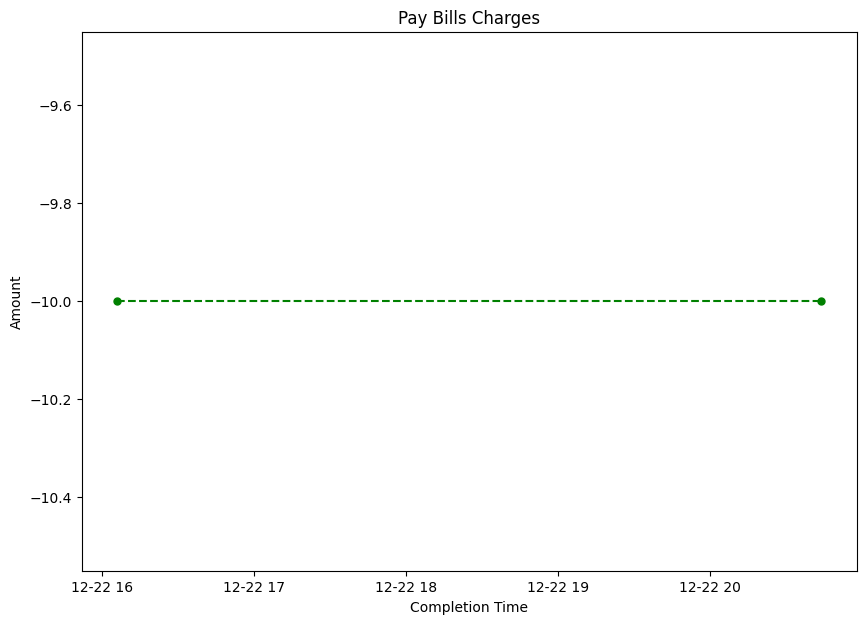

In [44]:
plt.figure(figsize=(10,7))

plt.title('Pay Bills Charges')
plt.xlabel('Completion Time')
plt.ylabel('Amount')

plt.plot (df1['Completion Time'], df1.Withdrawn,  color='green', marker='.', markersize=10, linestyle='--')


plt.show()

In [45]:
#saving to a csv file
df1.to_csv("Pay_Bill_Charge.csv",index = False)

In [46]:
#Filtering the Amount used to Withdraw Money through MPESA
matchers = 'Withdrawal Charge'
df['WC rows'] = df['Details'].str.find(matchers)

In [47]:
df2 = df[df['WC rows'] == 0]

In [48]:
print('Total amount is:', df2['Withdrawn'].sum())
print('Highest amount is:', df2['Withdrawn'].max())
print('Lowest amount is:', df2['Withdrawn'].min())
print('Average amount is:', df2['Withdrawn'].mean())
print('Median amount is:', df2['Withdrawn'].median())
print('Mode amount is:', df2['Withdrawn'].mode())

Total amount is: -58
Highest amount is: -29
Lowest amount is: -29
Average amount is: -29.0
Median amount is: -29.0
Mode amount is: 0   -29
Name: Withdrawn, dtype: int64


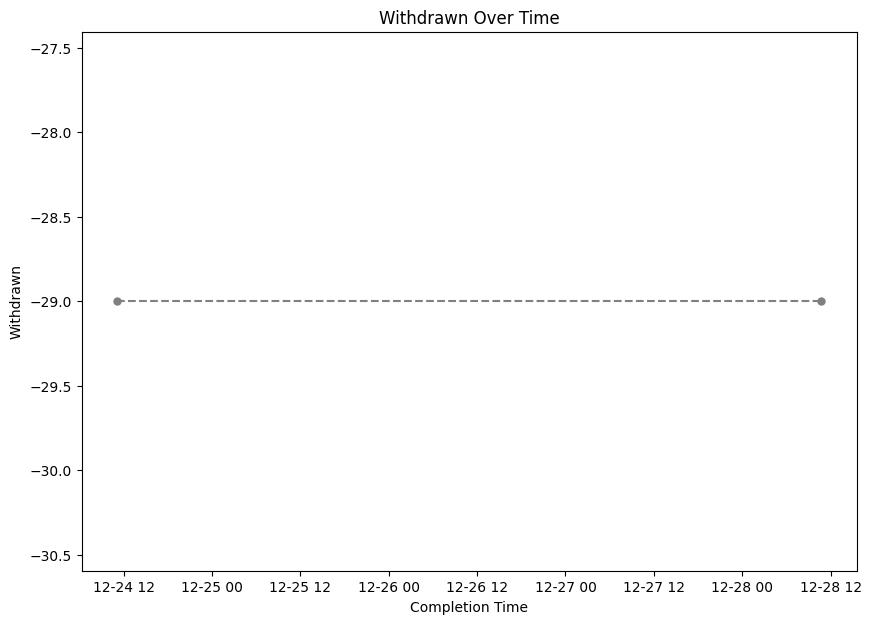

In [49]:
plt.figure(figsize=(10,7))

plt.title('Withdrawn Over Time')
plt.xlabel('Completion Time')
plt.ylabel('Withdrawn')

plt.plot (df2['Completion Time'], df2.Withdrawn,  color='grey', marker='.', markersize=10, linestyle='--')

#plt.xticks(df1['Completion Time'][::10].tolist())

plt.show()

In [50]:
#Filtering the Amount used to Transfer Funds through MPESA
matchers = 'Customer Transfer of'
df['CTF rows'] = df['Details'].str.find(matchers)

In [51]:
df3 = df[df['CTF rows'] == 0]

print('Total amount is:', df3['Withdrawn'].sum())
print('Highest amount is:', df3['Withdrawn'].max())
print('Lowest amount is:', df3['Withdrawn'].min())
print('Average amount is:', df3['Withdrawn'].mean())
print('Median amount is:', df3['Withdrawn'].median())
print('Mode amount is:', df3['Withdrawn'].mode())

Total amount is: -106
Highest amount is: -7
Lowest amount is: -57
Average amount is: -13.25
Median amount is: -7.0
Mode amount is: 0   -7
Name: Withdrawn, dtype: int64


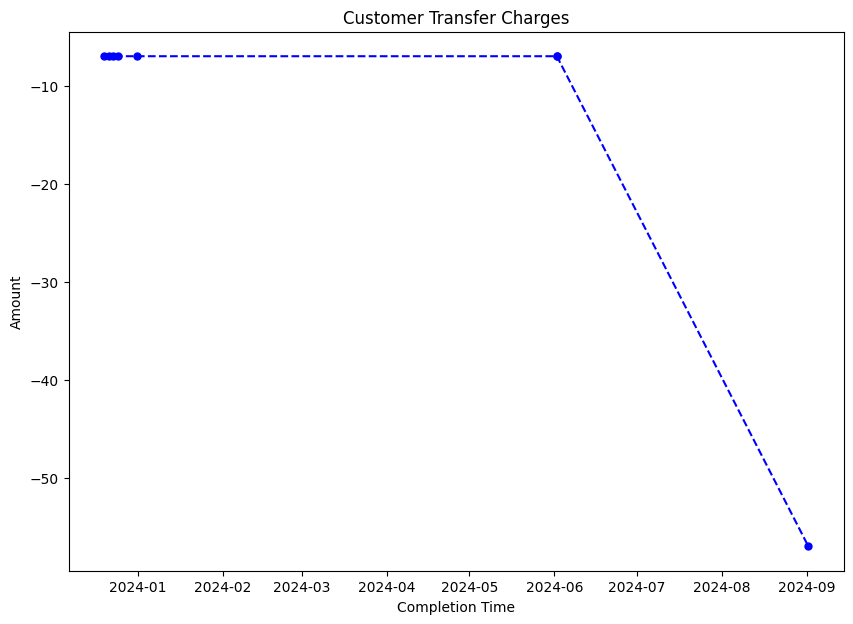

In [52]:
plt.figure(figsize=(10,7))

plt.title('Customer Transfer Charges')
plt.xlabel('Completion Time')
plt.ylabel('Amount')

plt.plot (df3['Completion Time'], df3.Withdrawn,  color='blue', marker='.', markersize=10, linestyle='--')

plt.show()

In [56]:
#Filtering the Amount used to pay bills through MPESA
matchers = 'Pay Bill to'
df['PBT rows'] = df['Details'].str.find(matchers)

In [67]:
df4 = df[df['PBT rows'] == 0]

print('Total amount is:', df4['Withdrawn'].sum())
print('Highest amount is:', df4['Withdrawn'].max())
print('Lowest amount is:', df4['Withdrawn'].min())
print('Average amount is:', df4['Withdrawn'].mean())
print('Median amount is:', df4['Withdrawn'].median())
print('Mode amount is:', df4['Withdrawn'].mode())


Total amount is: -620
Highest amount is: 0
Lowest amount is: -600
Average amount is: -206.66666666666666
Median amount is: -20.0
Mode amount is: 0   -600
1    -20
2      0
Name: Withdrawn, dtype: int64


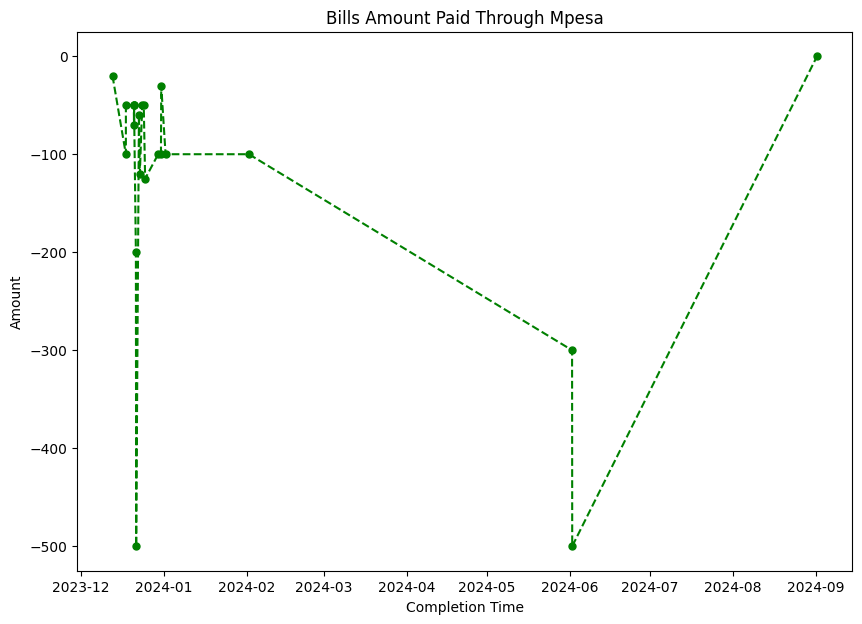

In [68]:
plt.figure(figsize=(10,7))

plt.title('Bills Amount Paid Through Mpesa')
plt.xlabel('Completion Time')
plt.ylabel('Amount')

plt.plot (df4['Completion Time'], df4.Withdrawn,  color='green', marker='.', markersize=10, linestyle='--')


plt.show()


In [69]:
#Filtering the Amount used to purchase airtime Funds through MPESA
matchers = 'Airtime Purchase'
df['AP rows'] = df['Details'].str.find(matchers)

In [70]:
df5 = df[df['AP rows'] == 0]

print('Total amount Send is:', df5['Withdrawn'].sum())
print('Highest amount Send is:', df5['Withdrawn'].max())
print('Lowest amount Send is:', df5['Withdrawn'].min())
print('Average amount is:', df5['Withdrawn'].mean())
print('Median amount is:', df5['Withdrawn'].median())
print('Mode amount is:', df5['Withdrawn'].mode())

Total amount Send is: -1333
Highest amount Send is: -5
Lowest amount Send is: -300
Average amount is: -63.476190476190474
Median amount is: -40.0
Mode amount is: 0   -20
Name: Withdrawn, dtype: int64


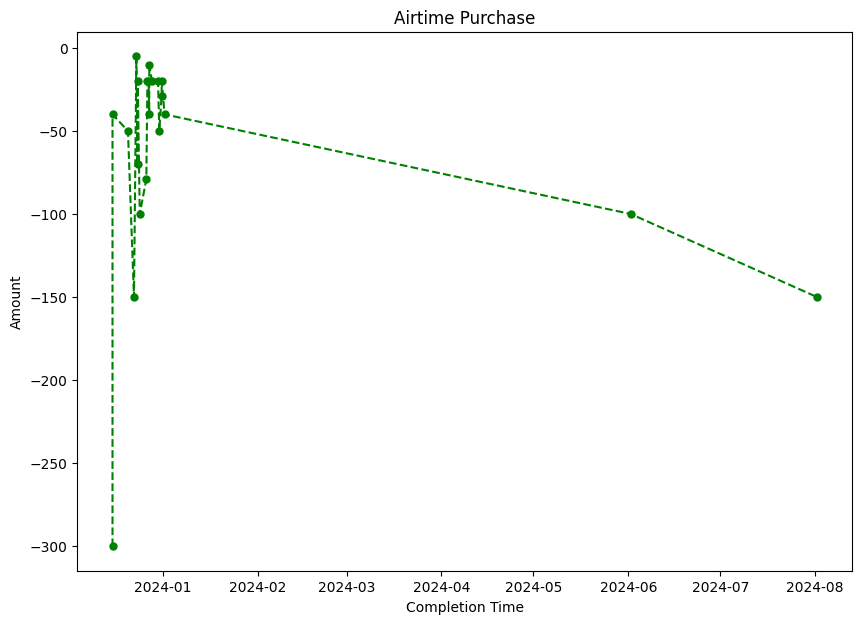

In [72]:
plt.figure(figsize=(10,7))

plt.title('Airtime Purchase')
plt.xlabel('Completion Time')
plt.ylabel('Amount')

plt.plot (df5['Completion Time'], df5.Withdrawn,  color='green', marker='.', markersize=10, linestyle='--')


plt.show()

In [64]:
#Filtering the Amount send to other MPESA account(credit)
matchers = 'Customer Transfer to'
df['Kutuma rows'] = df['Details'].str.find(matchers)

In [65]:
df6 = df[df['Kutuma rows'] == 0]

print('Total amount Send is:', df6['Withdrawn'].sum())
print('Highest amount Send is:', df6['Withdrawn'].max())
print('Lowest amount Send is:', df6['Withdrawn'].min())
print('Average amount is:', df6['Withdrawn'].mean())
print('Median amount is:', df6['Withdrawn'].median())
print('Mode amount is:', df6['Withdrawn'].mode())

Total amount Send is: -2725
Highest amount Send is: 0
Lowest amount Send is: -500
Average amount is: -123.86363636363636
Median amount is: -85.0
Mode amount is: 0   -50
Name: Withdrawn, dtype: int64


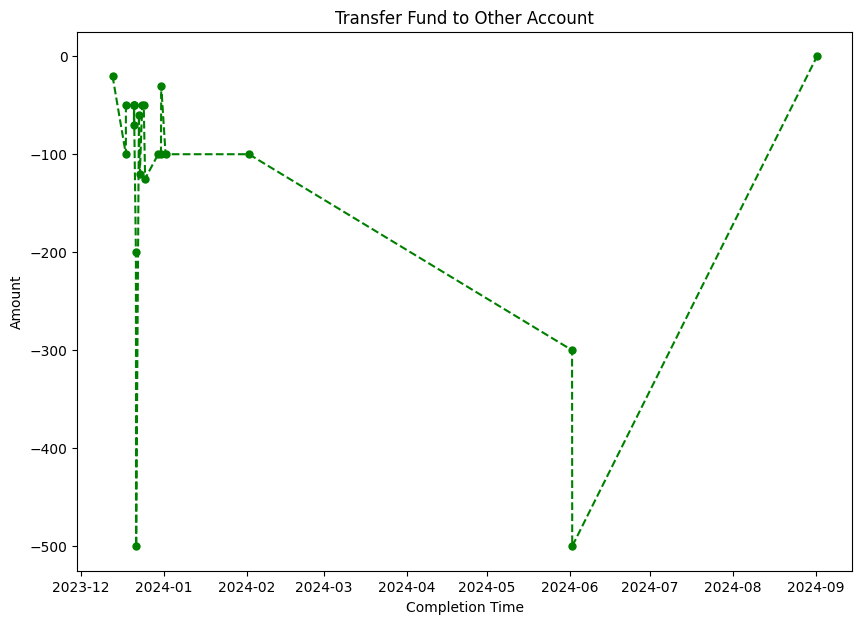

In [73]:
plt.figure(figsize=(10,7))

plt.title('Transfer Fund to Other Account')
plt.xlabel('Completion Time')
plt.ylabel('Amount')

plt.plot (df6['Completion Time'], df6.Withdrawn,  color='green', marker='.', markersize=10, linestyle='--')


plt.show()


In [74]:
# Define criteria and assign scores
df['OnTimePayments'] = np.where(df['Transaction Status'] == 'Completed', 1, 0)
df['WithdrawalPattern'] = np.where(df['Withdrawn'] > -50, 1, -1)

# Calculate total credit score
df['CreditScore'] = df['OnTimePayments'] + df['WithdrawalPattern']

# Display relevant columns
result_df = df[['Completion Time', 'Transaction Status', 'Withdrawn', 'OnTimePayments', 'WithdrawalPattern', 'CreditScore']]
print(result_df)

        Completion Time Transaction Status  Withdrawn  OnTimePayments  \
231 2023-11-12 18:33:00          Completed       -250               1   
228 2023-12-12 17:32:00          Completed        -20               1   
226 2023-12-12 19:26:00          Completed        -20               1   
225 2023-12-12 19:30:00          Completed          0               1   
222 2023-12-12 19:38:00          Completed        -40               1   
..                  ...                ...        ...             ...   
220                 NaT                NaN          0               0   
223                 NaT                NaN          0               0   
227                 NaT                NaN          0               0   
229                 NaT                NaN          0               0   
230                 NaT                NaN          0               0   

     WithdrawalPattern  CreditScore  
231                 -1            0  
228                  1            2  
226      

In [79]:
# Lets see if they are eligible
eligible_df = df[df['CreditScore'] >= 1]

# Print eligible individuals
print("Eligible :")
print(eligible_df[['Completion Time', 'Transaction Status', 'Withdrawn', 'OnTimePayments', 'WithdrawalPattern', 'CreditScore']])

Eligible :
        Completion Time Transaction Status  Withdrawn  OnTimePayments  \
228 2023-12-12 17:32:00          Completed        -20               1   
226 2023-12-12 19:26:00          Completed        -20               1   
225 2023-12-12 19:30:00          Completed          0               1   
222 2023-12-12 19:38:00          Completed        -40               1   
224 2023-12-12 19:38:00          Completed          0               1   
..                  ...                ...        ...             ...   
220                 NaT                NaN          0               0   
223                 NaT                NaN          0               0   
227                 NaT                NaN          0               0   
229                 NaT                NaN          0               0   
230                 NaT                NaN          0               0   

     WithdrawalPattern  CreditScore  
228                  1            2  
226                  1            2 